In [43]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import json
from sqlalchemy import text
from src.db_connect import get_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Create engine
engine = get_engine()

In [45]:
df_customers = pd.read_sql(text('SELECT * FROM s_hamayunrahimzai.stg_customers;'), con=engine)
df_customers_insights = pd.read_sql(text('SELECT * FROM s_hamayunrahimzai.mart_customer_insights;'), con=engine)



In [46]:
df_customers_insights.head()

,customer_id,full_name,email,recency_days,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_total,customer_segment
0,100,Gilda Nurdiyanti,ed22ddc5_151b_4128_9590_de9b0bc8bfc6@startupca...,1088,2,227544.0,1,1,1,3,At Risk Customer
1,10000,Cakrabuana Ardianto,818ffe25_3914_4386_9449_d693a05264f1@zakyfound...,44,8,7178324.0,2,2,2,6,Loyal Customer
2,10001,Ella Suryatmi,8ae0c4fa_171a_466f_9863_64cbb22f956e@startupca...,81,11,10574864.0,2,2,2,6,Loyal Customer
3,10002,Labuh Santoso,2ca61485_e5f8_43f8_8000_df57c3d5da27@startupca...,220,3,918279.0,1,1,1,3,At Risk Customer
4,10003,Makara Sitompul,13fc2a1c_0582_4268_81f1_d8f6e4511904@startupca...,198,3,801299.0,1,1,1,3,At Risk Customer


In [13]:
df_customers.head()

,customer_id,first_name,last_name,full_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,Lala Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,Female,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,Maimunah Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,Female,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,Bakiman Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,Male,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,Cahyadi Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,Male,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,Irnanto Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,Male,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [48]:
df_customers_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       50242 non-null  object 
 1   full_name         50242 non-null  object 
 2   email             50242 non-null  object 
 3   recency_days      50242 non-null  int64  
 4   frequency         50242 non-null  int64  
 5   monetary          50242 non-null  float64
 6   recency_score     50242 non-null  int64  
 7   frequency_score   50242 non-null  int64  
 8   monetary_score    50242 non-null  int64  
 9   rfm_total         50242 non-null  int64  
 10  customer_segment  50242 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 4.2+ MB


In [49]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  object 
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   full_name           100000 non-null  object 
 4   username            100000 non-null  object 
 5   email               100000 non-null  object 
 6   gender              100000 non-null  object 
 7   birthdate           100000 non-null  object 
 8   device_type         100000 non-null  object 
 9   device_id           100000 non-null  object 
 10  device_version      100000 non-null  object 
 11  home_location_lat   100000 non-null  float64
 12  home_location_long  100000 non-null  float64
 13  home_location       100000 non-null  object 
 14  home_country        100000 non-null  object 
 15  first_join_date     100000 non-null

In [50]:
# Select only the demographic columns we want to add from df_customers
demographics_to_add = df_customers[['customer_id', 'gender', 'birthdate', 'device_type', 'home_location', 'home_country']].copy()

# Merge the RFM insights with these selected customer demographics
# We use a 'left' merge to keep all customers from the insights table
merged_customer_data = pd.merge(
    df_customers_insights,
    demographics_to_add,
    on='customer_id',
    how='left'
)
merged_customer_data.head()


,customer_id,full_name,email,recency_days,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_total,customer_segment,gender,birthdate,device_type,home_location,home_country
0,100,Gilda Nurdiyanti,ed22ddc5_151b_4128_9590_de9b0bc8bfc6@startupca...,1088,2,227544.0,1,1,1,3,At Risk Customer,Female,1991-03-02,Android,Jawa Timur,Indonesia
1,10000,Cakrabuana Ardianto,818ffe25_3914_4386_9449_d693a05264f1@zakyfound...,44,8,7178324.0,2,2,2,6,Loyal Customer,Male,2005-01-27,Android,Jawa Tengah,Indonesia
2,10001,Ella Suryatmi,8ae0c4fa_171a_466f_9863_64cbb22f956e@startupca...,81,11,10574864.0,2,2,2,6,Loyal Customer,Female,2001-06-16,Android,Banten,Indonesia
3,10002,Labuh Santoso,2ca61485_e5f8_43f8_8000_df57c3d5da27@startupca...,220,3,918279.0,1,1,1,3,At Risk Customer,Male,2001-03-09,iOS,Jawa Tengah,Indonesia
4,10003,Makara Sitompul,13fc2a1c_0582_4268_81f1_d8f6e4511904@startupca...,198,3,801299.0,1,1,1,3,At Risk Customer,Male,1988-09-17,Android,Jawa Tengah,Indonesia


In [51]:
merged_customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       50242 non-null  object 
 1   full_name         50242 non-null  object 
 2   email             50242 non-null  object 
 3   recency_days      50242 non-null  int64  
 4   frequency         50242 non-null  int64  
 5   monetary          50242 non-null  float64
 6   recency_score     50242 non-null  int64  
 7   frequency_score   50242 non-null  int64  
 8   monetary_score    50242 non-null  int64  
 9   rfm_total         50242 non-null  int64  
 10  customer_segment  50242 non-null  object 
 11  gender            50242 non-null  object 
 12  birthdate         50242 non-null  object 
 13  device_type       50242 non-null  object 
 14  home_location     50242 non-null  object 
 15  home_country      50242 non-null  object 
dtypes: float64(1), int64(6), object(9)
memor

# Calculate average RFM metrics (Recency, Frequency, Monetary) for each segment
 This helps us understand the typical behavior of customers in each group

In [52]:
segment_rfm_summary = merged_customer_data.groupby('customer_segment')[['recency_days', 'frequency', 'monetary']].mean().reset_index()
print("\n--- Average RFM Metrics by Segment ---")
print(segment_rfm_summary.round(2)) # Round for cleaner display


--- Average RFM Metrics by Segment ---
   customer_segment  recency_days  frequency     monetary
0  At Risk Customer        671.52       1.95   1010087.99
1    Loyal Customer         64.12      13.42  22246543.91
2  Regular Customer        192.69       5.46   8347611.78
3      VIP Customer         29.22      50.56  93606934.96


Calculate the size and percentage of customers in each segment

In [53]:
segment_counts = merged_customer_data['customer_segment'].value_counts().reset_index()
segment_counts.columns = ['customer_segment', 'customer_count']
segment_counts['percentage'] = (segment_counts['customer_count'] / len(merged_customer_data)) * 100
print("\n--- Customer Count and Percentage by Segment ---")
print(segment_counts.round(2))


--- Customer Count and Percentage by Segment ---
   customer_segment  customer_count  percentage
0  At Risk Customer           17613       35.06
1  Regular Customer           12025       23.93
2      VIP Customer           11836       23.56
3    Loyal Customer            8768       17.45


VIP Customer

In [54]:

print("VIP Customer")
vip_df = merged_customer_data[merged_customer_data['customer_segment'] == 'VIP Customer']

print("Top 3 Home Locations (Cities):")
print(vip_df['home_location'].value_counts(normalize=True).head(3).round(2))

print("Gender Distribution:")
print(vip_df['gender'].value_counts(normalize=True).round(2))

VIP Customer
Top 3 Home Locations (Cities):
home_location
Jakarta Raya    0.18
Jawa Barat      0.12
Jawa Tengah     0.11
Name: proportion, dtype: float64
Gender Distribution:
gender
Female    0.64
Male      0.36
Name: proportion, dtype: float64


Loyal Customer

In [55]:
print("Loyal Customer")
loyal_df = merged_customer_data[merged_customer_data['customer_segment'] == 'Loyal Customer']

print("Top 3 Home Locations (Cities):")
print(loyal_df['home_location'].value_counts(normalize=True).head(3).round(2))

print("Gender Distribution:")
print(loyal_df['gender'].value_counts(normalize=True).round(2))

Loyal Customer
Top 3 Home Locations (Cities):
home_location
Jakarta Raya    0.19
Jawa Barat      0.11
Jawa Tengah     0.11
Name: proportion, dtype: float64
Gender Distribution:
gender
Female    0.64
Male      0.36
Name: proportion, dtype: float64


Regular Customer

In [56]:

print("\nRegular Customer")
regular_df = merged_customer_data[merged_customer_data['customer_segment'] == 'Regular Customer']

print("Top 3 Home Locations (Cities):")
print(regular_df['home_location'].value_counts(normalize=True).head(3).round(2))

print("Gender Distribution:")
print(regular_df['gender'].value_counts(normalize=True).round(2))


Regular Customer
Top 3 Home Locations (Cities):
home_location
Jakarta Raya    0.18
Jawa Barat      0.11
Jawa Tengah     0.11
Name: proportion, dtype: float64
Gender Distribution:
gender
Female    0.65
Male      0.35
Name: proportion, dtype: float64


# Bar chart: Number of Customers by Segment

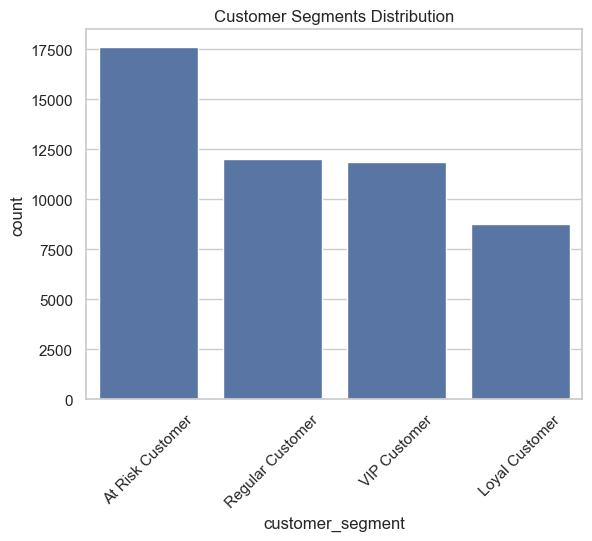

In [61]:
sns.countplot(data=df_customers_insights, x='customer_segment', order=df_customers_insights['customer_segment'].value_counts().index)
plt.title("Customer Segments Distribution")
plt.xticks(rotation=45)
plt.show()

# Pie chart: Revenue Contribution by Segment

In [63]:
segment_performance = df_customers_insights.groupby('customer_segment').agg(
    total_revenue=('monetary', 'sum'),
    customer_count=('customer_id', 'count')
).reset_index()


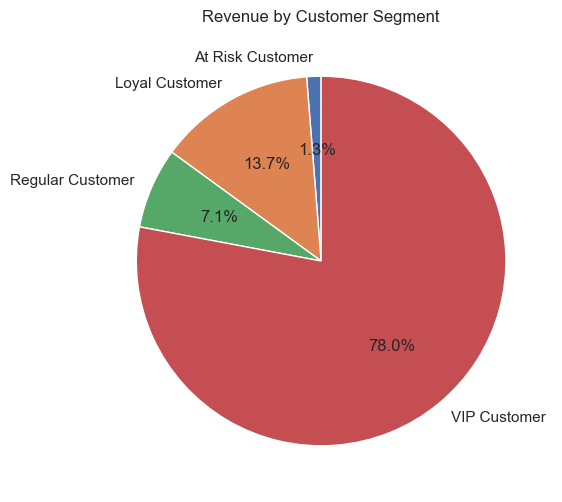

In [64]:
plt.figure(figsize=(6, 6))
plt.pie(
    segment_performance['total_revenue'],
    labels=segment_performance['customer_segment'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Revenue by Customer Segment')
plt.show()

# Box Plot: Recency Distribution by Segmen

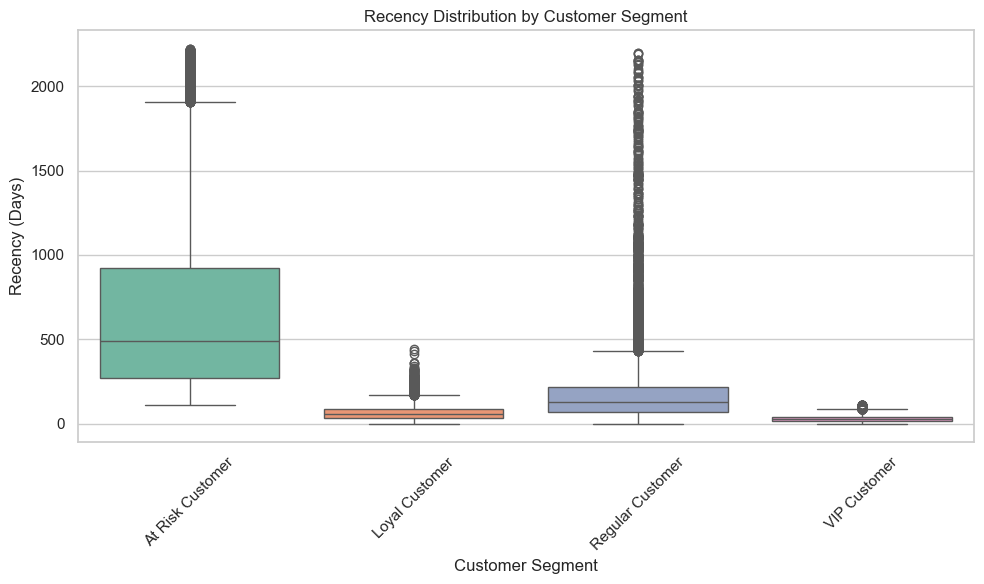

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_customers_insights,
    x='customer_segment',
    y='recency_days',
    hue='customer_segment',       
    palette='Set2',
    legend=False                  
)
plt.title('Recency Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Recency (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot: Frequency vs. Monetary (Colored by Segment)

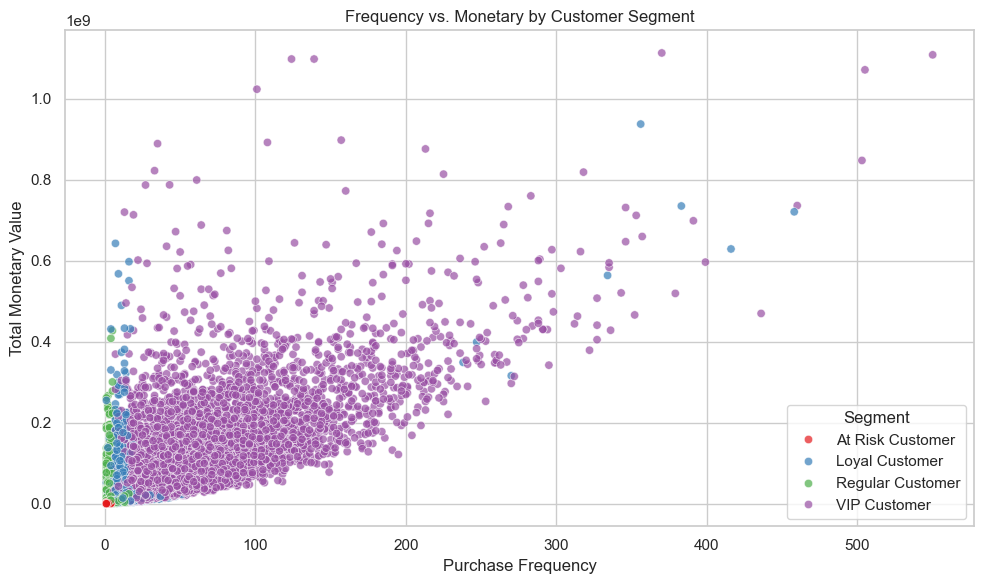

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_customers_insights, x='frequency', y='monetary', hue='customer_segment', palette='Set1', alpha=0.7)
plt.title('Frequency vs. Monetary by Customer Segment')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Monetary Value')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

# Heatmap of RFM Scores

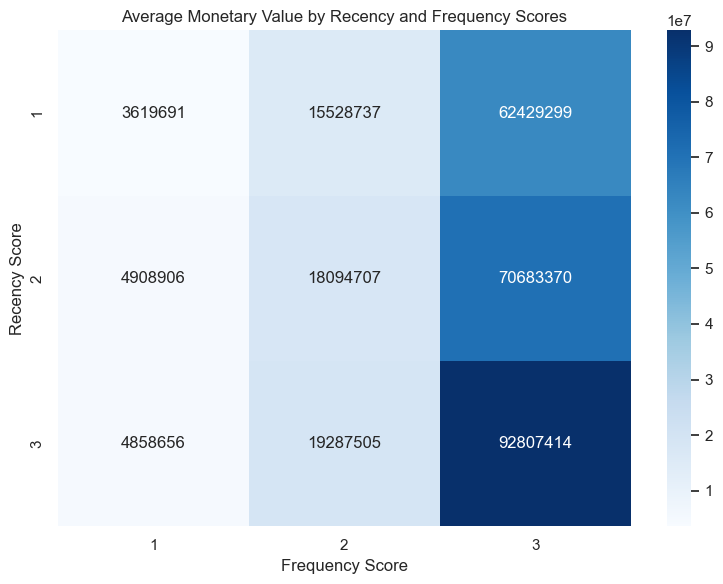

In [73]:
rfm_score_heatmap = df_customers_insights.pivot_table(index='recency_score', columns='frequency_score', values='monetary', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_score_heatmap, annot=True, fmt='.0f', cmap='Blues')
plt.title('Average Monetary Value by Recency and Frequency Scores')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.tight_layout()
plt.show()

# Correlation Matrix (Recency, Frequency, Monetary)

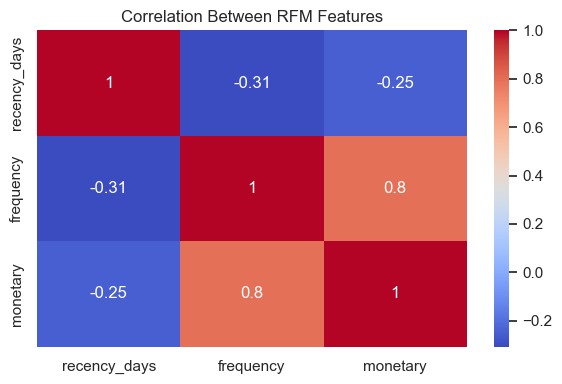

In [75]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_customers_insights[['recency_days', 'frequency', 'monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between RFM Features')
plt.tight_layout()
plt.show()